# Tutorial for using the package `fast-ml` 

This package is as good as having a junior Data Scientist working for you. Most of the commonly used EDA steps, Missing Data Imputation techniques, Feature Engineering steps are covered in a ready to use format

## Part 4. Outlier Analysis and Treatment



#### 1. Import eda module from the package 
`from fast_ml.missing_data_imputation import MissingDataImputer_Categorical, MissingDataImputer_Numerical`

#### 2. Define the imputer object. 
* For Categorical variables use `MissingDataImputer_Categorical`
* For Numerical variables use `MissingDataImputer_Numerical`

`cat_imputer = MissingDataImputer_Categorical(method = 'frequent')`

#### 3. Fit the object on your dataframe and provide a list of variables
`cat_imputer.fit(train, variables = ['BsmtQual'])`

#### 4. Apply the transform method on train / test dataset
`train = cat_imputer.transform(train)`
<br>&<br>
`test = cat_imputer.transform(test)`

#### 5. parameter dictionary gets created which store the values used for imputation. It can be viewed as
`cat_imputer.param_dict_`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fast_ml.outlier_treatment import check_outliers

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/house_prices.csv')
df.shape

(1460, 81)

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
numeric_type = ['float64', 'int64']
category_type = ['object']

## Start Outlier Treatment

## Step 1. Check for outliers

In [4]:
outlier_df = check_outliers(df)
outlier_df

,lower_bound_outliers,upper_bound_outliers,total_outliers,perc_outliers
EnclosedPorch,0,208,208,14.246575
BsmtFinSF2,0,167,167,11.438356
OverallCond,31,94,125,8.561644
ScreenPorch,0,116,116,7.945205
MSSubClass,0,103,103,7.054795
BsmtHalfBath,0,82,82,5.616438
OpenPorchSF,0,77,77,5.273973
LotArea,2,67,69,4.726027
KitchenAbvGr,1,67,68,4.657534
SalePrice,0,61,61,4.178082


### 1. OverallCond

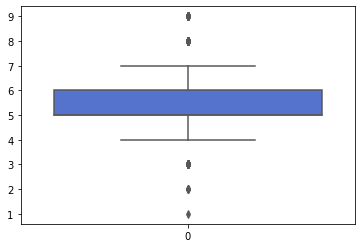

In [9]:
# Graph before outlier treatment
sns.boxplot(data = df['OverallCond'], orient='v', color='royalblue')
plt.show()

In [ ]:
# Graph after outlier treatment
sns.boxplot(data = df['OverallCond'], orient='v', color='royalblue')
plt.show()

In [ ]:
# Use the following method for a numerical variable 
eda_obj.eda_numerical_variable('MSSubClass')

### 2.  GarageYrBlt

In [ ]:
# Use the following method for a numerical variable 
eda_obj.eda_numerical_variable('LotFrontage')

## Categorical Variables

### 1. BsmtQual 

### 2. FireplaceQu

In [39]:
def check_outliers(df, variables=None, tol=1.5):
    """
    This functions checks for outliers in the dataset using the Inter Quartile Range (IQR) calculation
    IQR is defined as quartile_3 - quartile_1
    lower_bound = quartile_1 - tolerance_value * IQR
    upper_bound = quartile_3 + tolerance_value * IQR
    
    Parameters:
    -----------
        df : dataset on which you are working on
        variables: optional parameter. list of all the numeric variables. 
                   if not provided then it automatically identifies the numeric variables and analyzes for them
        tol : tolerance value(default value = 1.5) Usually it is used as 1.5 or 3
        
    Returns:
    --------
        dataframe with variables that contain outliers
    """
    
    outlier_dict = {}
    
    if variables == None:
        variables = df.select_dtypes('int', 'float').columns
    else:
        variables = variables
        
    for var in variables:
        s = df.loc[df[var].notnull(), var]
        
        quartile_1, quartile_3 = np.percentile(s, [25,75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - tol*iqr
        upper_bound = quartile_3 + tol*iqr
        
        lower_bound_outlier = np.sum(s<lower_bound)
        upper_bound_outlier = np.sum(s>upper_bound)
        if lower_bound_outlier >0 or upper_bound_outlier>0:
            outlier_dict[var] = {'lower_bound_outliers': lower_bound_outlier, 
                                 'upper_bound_outliers' : upper_bound_outlier,
                                 'total_outliers' : lower_bound_outlier+upper_bound_outlier} 
    
    outlier_df = pd.DataFrame(data = outlier_dict).transpose().sort_values(by='total_outliers' , ascending = False)
    outlier_df['perc_outliers'] = (outlier_df['total_outliers'] / len(df)).mul(100)
    
    return outlier_df